# Pokemon Data Science Project
## By Juliette Gudknecht - jg4390
## Python for Data Science Course - Spring 2022

# Introduction
The data set I chose is easily available online at kaggle.com if you search "Pokémon dataset", or is available here: https://www.kaggle.com/datasets/abcsds/pokemon

The reason I chose this data set is because I have a personal interest in Pokémon. Pokémon is a role-playing game in which players must assemble a small team of monsters in order to battle other monsters in a journey to become the "very best". Pokémon are classified into distinct categories, such as psychic or fairy, each having its own set of abilities. The game of chess might be compared to their battles. Pokémon develop strength and new skills as they acquire experience. There isn't necessarily a problem to be solved, but I thought it would be interesting to predict if a Pokémon is legendary or not based on their stats. Legendary Pokémon are a special type of Pokémon that are very powerful that are often associated with legends of creation and/or destruction within their endemic regions. Some legendary pokemon are based off real cultures and historic mythical creatures. I went through the processes of Data/Data Preprocessing, Exploratory Analyses, Methods, Detailed Results, Discussion, and References. The models I used are Logistic Regression, K-Nearest Neighbors, Decision Trees, and XG Boost. They are explained in detail in the methods section. The data set includes the following variables: Name of Pokemon, Type 1 of Pokemon, Type 2 of Pokemon, Total Score, HP, Attack Score, Defense Score, Special Attack, Special Defense, Speed, Generation and Legendary Status. 



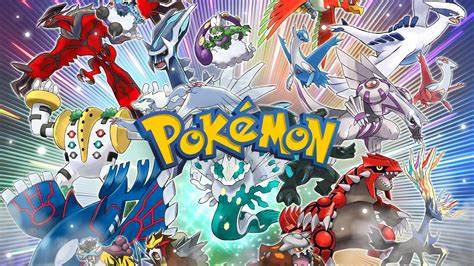


# Data/Data Preprocessing

Step One: Load the data and look at the first few rows.

In [114]:
import pandas as pd
data_path = '/Users/juliettegudknecht/Downloads/Pokemon.csv'

data = pd.read_csv(data_path)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Step Two: Check for null values, and decide what to do with them. 

In [115]:
pd.isnull(data).values.sum()

386

In [116]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

I am deciding here to keep the null values because it would drastically lower our data set and I find it okay that some don't have a type two.

# Exploratory analyses
Step Three: Descriptive Statistics

In [117]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [118]:
data.pivot_table(values = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
              index = ['Generation'],
              aggfunc = 'mean')

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788
6,75.804878,76.682927,68.268293,74.292683,74.890244,66.439024


In [119]:
import numpy as np
data.groupby(['Generation'])[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].agg([np.mean, np.min, np.max])

HP               Attack              Defense            \
                 mean amin amax       mean amin amax       mean amin amax   
Generation                                                                  
1           65.819277   10  250  76.638554    5  190  70.861446    5  180   
2           71.207547   20  255  72.028302   10  185  73.386792   10  230   
3           66.543750    1  170  81.625000   15  180  74.100000   20  230   
4           73.082645   20  150  82.867769    5  170  78.132231    5  168   
5           71.787879   30  165  82.066667   25  170  72.327273   30  145   
6           68.268293   38  126  75.804878   22  160  76.682927   33  184   

              Sp. Atk              Sp. Def                Speed            
                 mean amin amax       mean amin amax       mean amin amax  
Generation                                                                 
1           71.819277   15  194  69.090361   20  130  72.584337   15  150  
2           65.943396   10  165  73.905660   20  230  61.811321    5  130  
3           75.806250   10  180  71.225000   20  200  66.925000   10  180  
4           76.404959   10  150  77.190083   30  150  71.338843    5  135  
5           71.987879   15  170  68.739394   25  135  68.078788   10  145  
6           74.292683   27  170  74.890244   25  154  66.439024   23  126

In [120]:
pd.pivot_table(data,index=["Legendary"])

,#,Attack,Defense,Generation,HP,Sp. Atk,Sp. Def,Speed,Total
Legendary,,,,,,,,,
False,353.315646,75.669388,71.559184,3.284354,67.182313,68.454422,68.892517,65.455782,417.213605
True,470.215385,116.676923,99.661538,3.769231,92.738462,122.184615,105.938462,100.184615,637.384615


Describe the stats here.

Step Four: Visualize the data

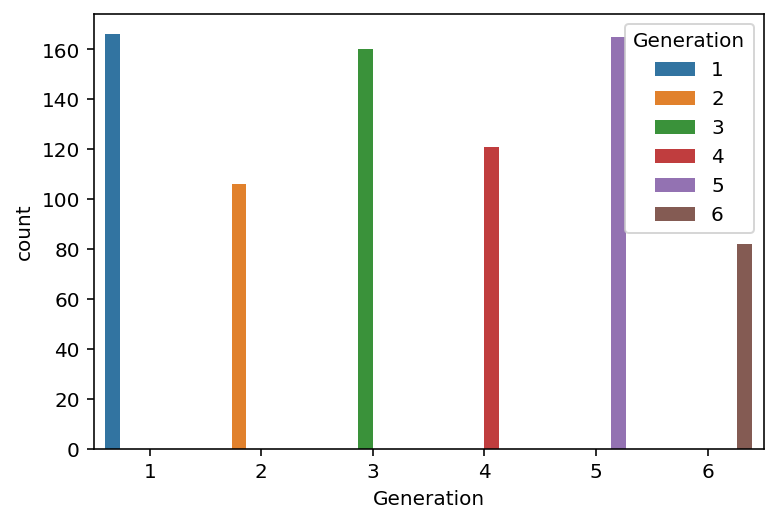

In [121]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.countplot(x='Generation', hue='Generation', data=data)

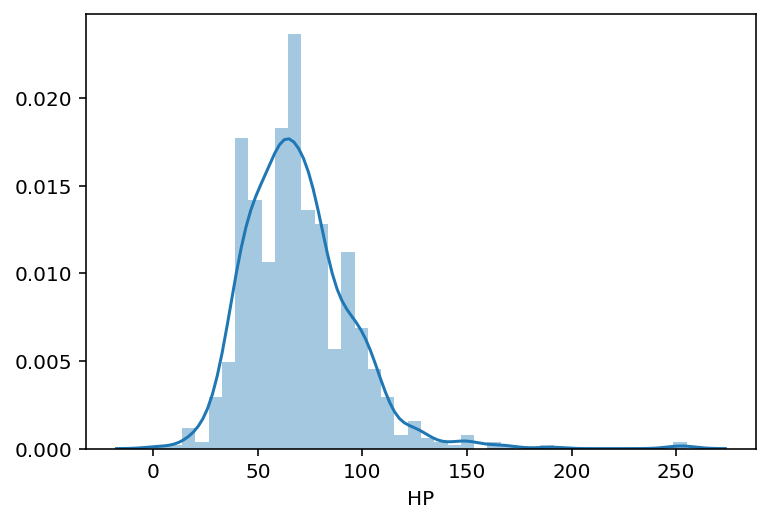

In [122]:
import matplotlib.pyplot as plt
sns.distplot(data.HP)
plt.show()

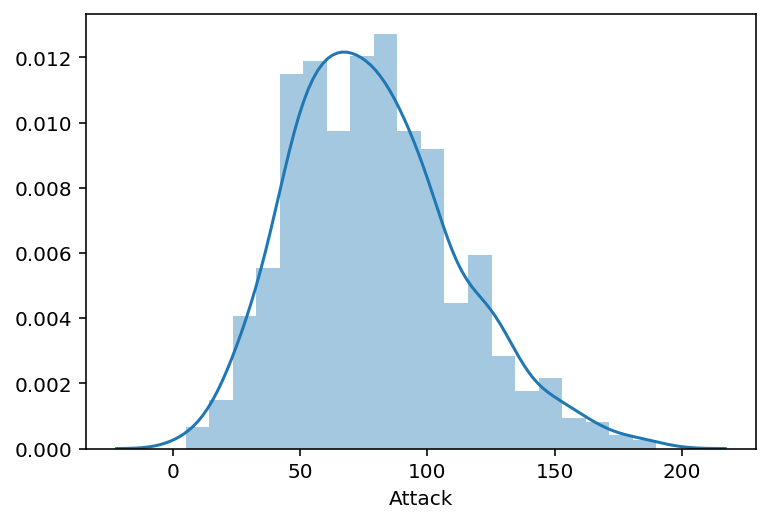

In [123]:
sns.distplot(data.Attack)
plt.show()

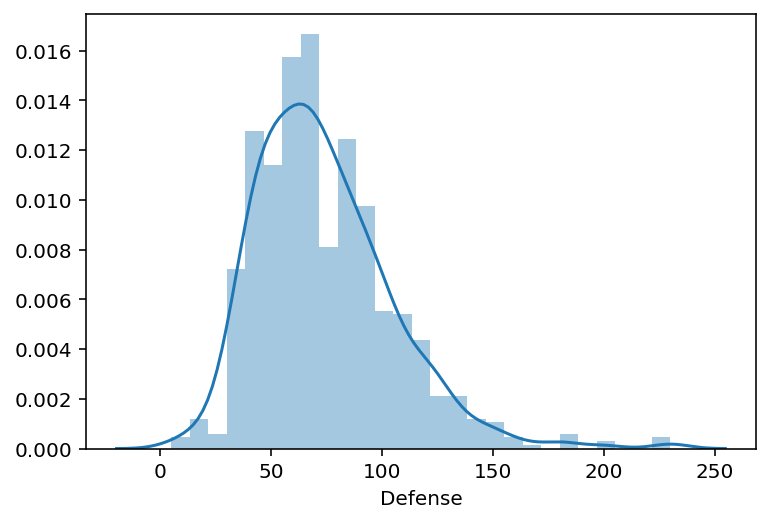

In [124]:
sns.distplot(data.Defense)
plt.show()

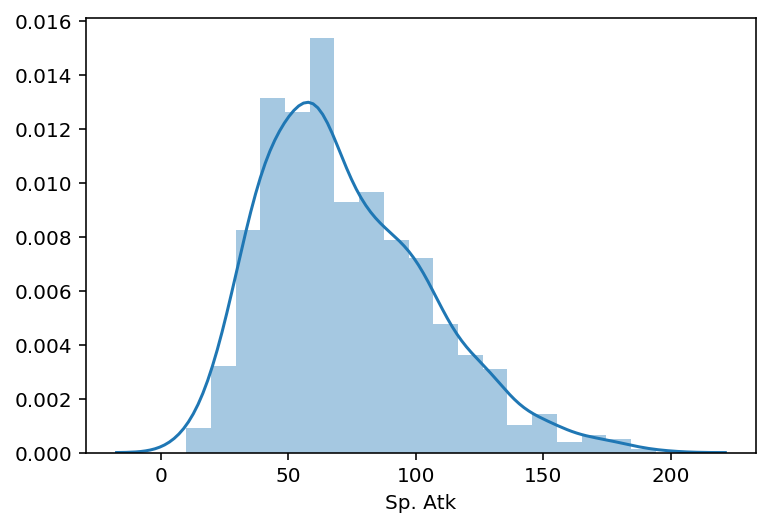

In [125]:
sns.distplot(data['Sp. Atk'])
plt.show()

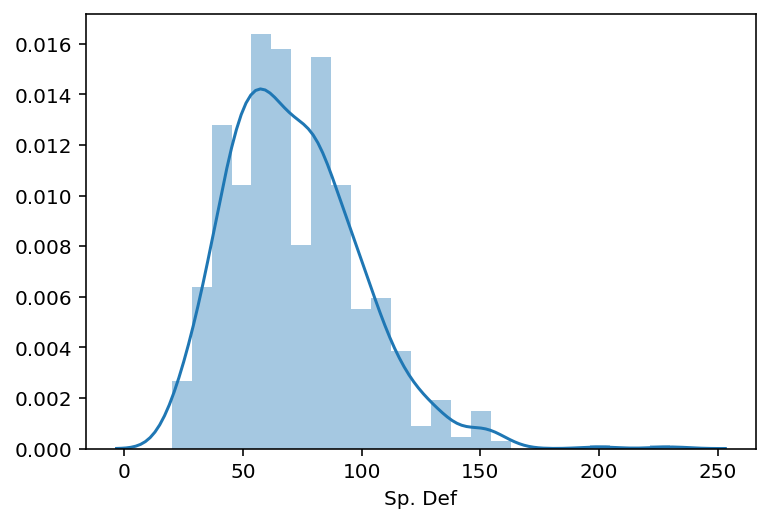

In [126]:
sns.distplot(data['Sp. Def'])
plt.show()

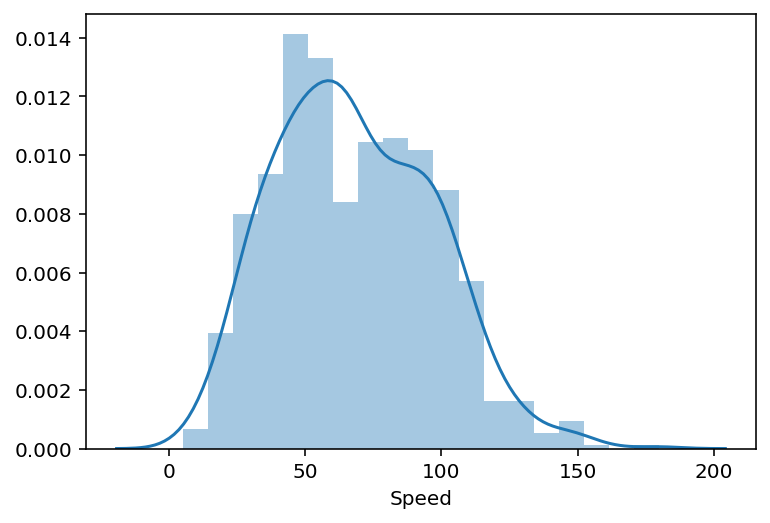

In [127]:
sns.distplot(data['Speed'])
plt.show()

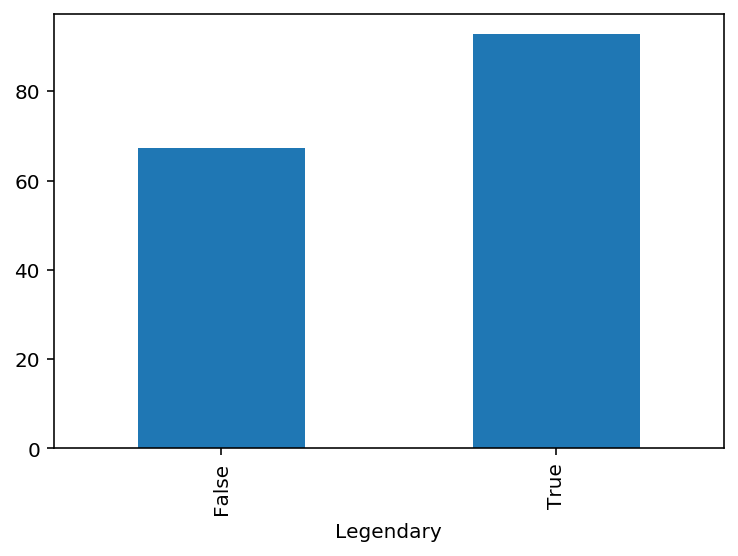

In [128]:
data.groupby('Legendary').HP.mean().plot(kind='bar')

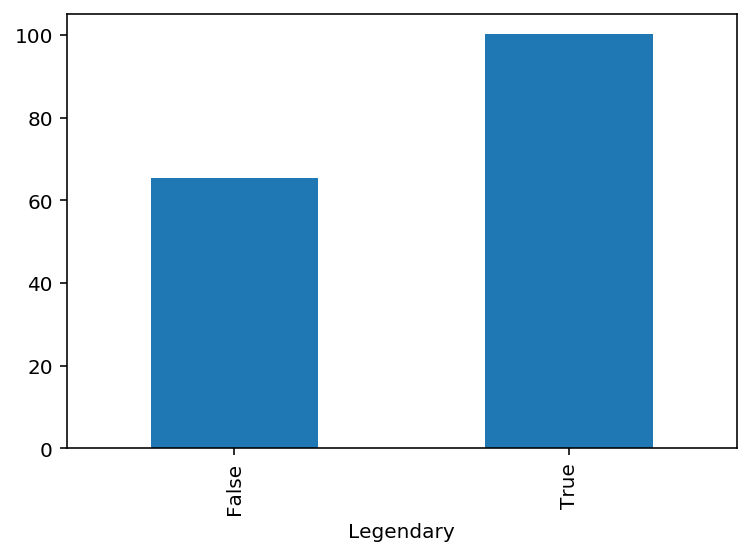

In [129]:
data.groupby('Legendary').Speed.mean().plot(kind='bar')

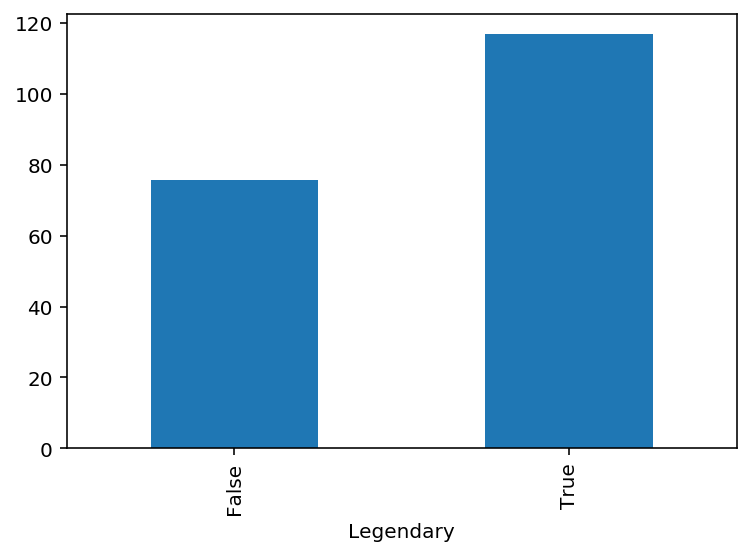

In [130]:
data.groupby('Legendary').Attack.mean().plot(kind='bar')

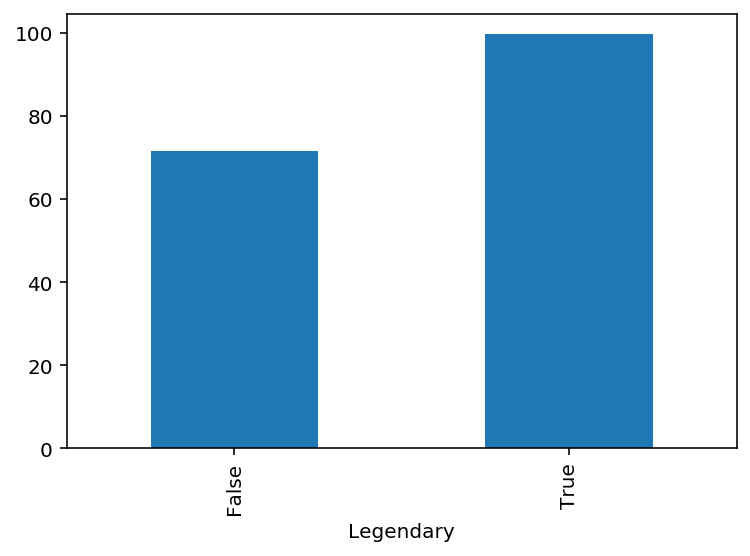

In [131]:
data.groupby('Legendary').Defense.mean().plot(kind='bar')

In [135]:
import plotly.express as px
fig = px.histogram(data, x="Type 1", color='Type 1', nbins=10)
fig.show()

In [203]:
fig = px.histogram(data, x=data['Type 2'].dropna(), color=data['Type 2'].dropna())
fig.show()

In [137]:
fig = px.scatter(data, x="Total",y='Generation', color='Legendary')
fig.show()

In [138]:
fig = px.box(data, x="Total",y='Type 1', color='Legendary')
fig.show()

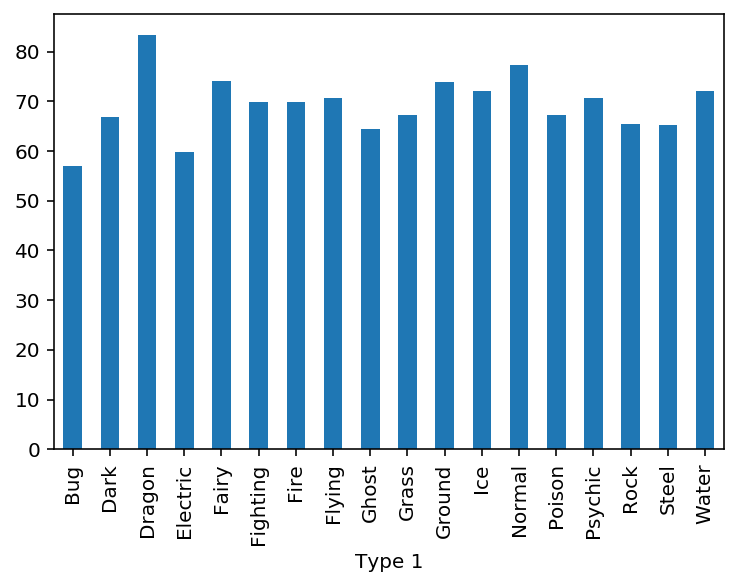

In [139]:
data.groupby('Type 1').HP.mean().plot(kind='bar')

Text(0.5, 1.0, 'Attack vs Defense')

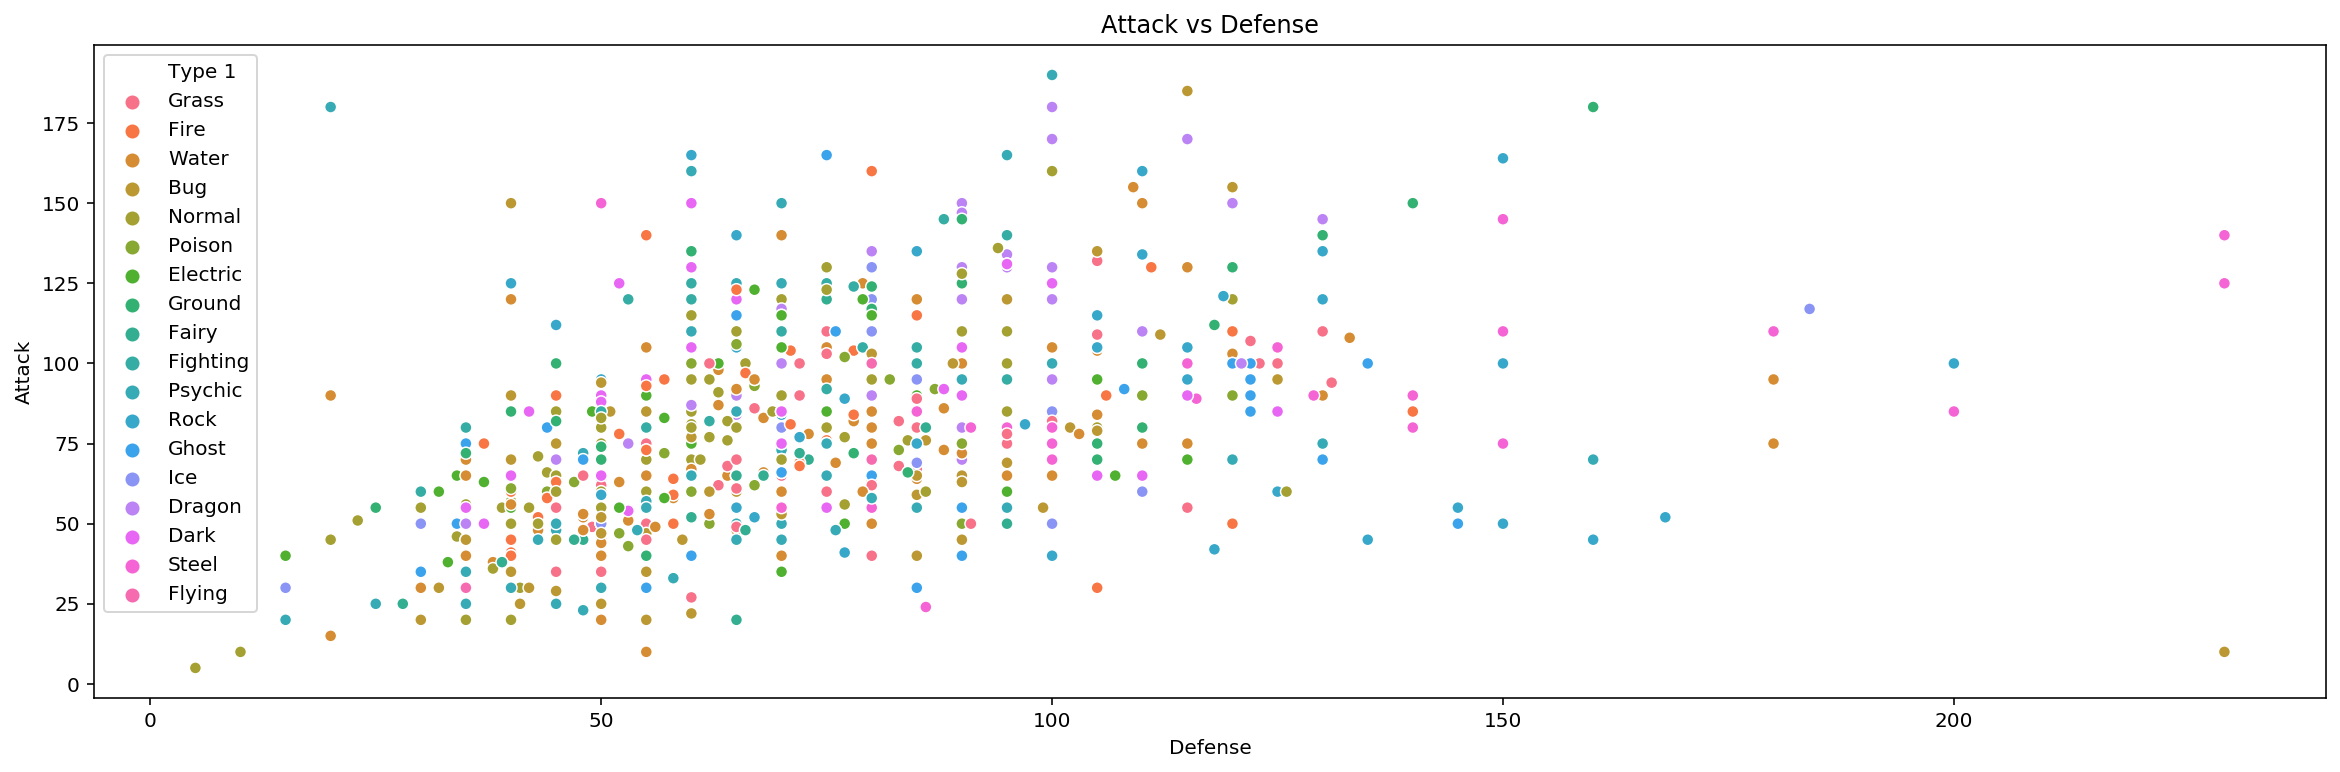

In [140]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data, x="Defense", y="Attack", hue="Type 1")
plt.title("Attack vs Defense")

Text(0.5, 1.0, 'Special Attack vs Special Defense')

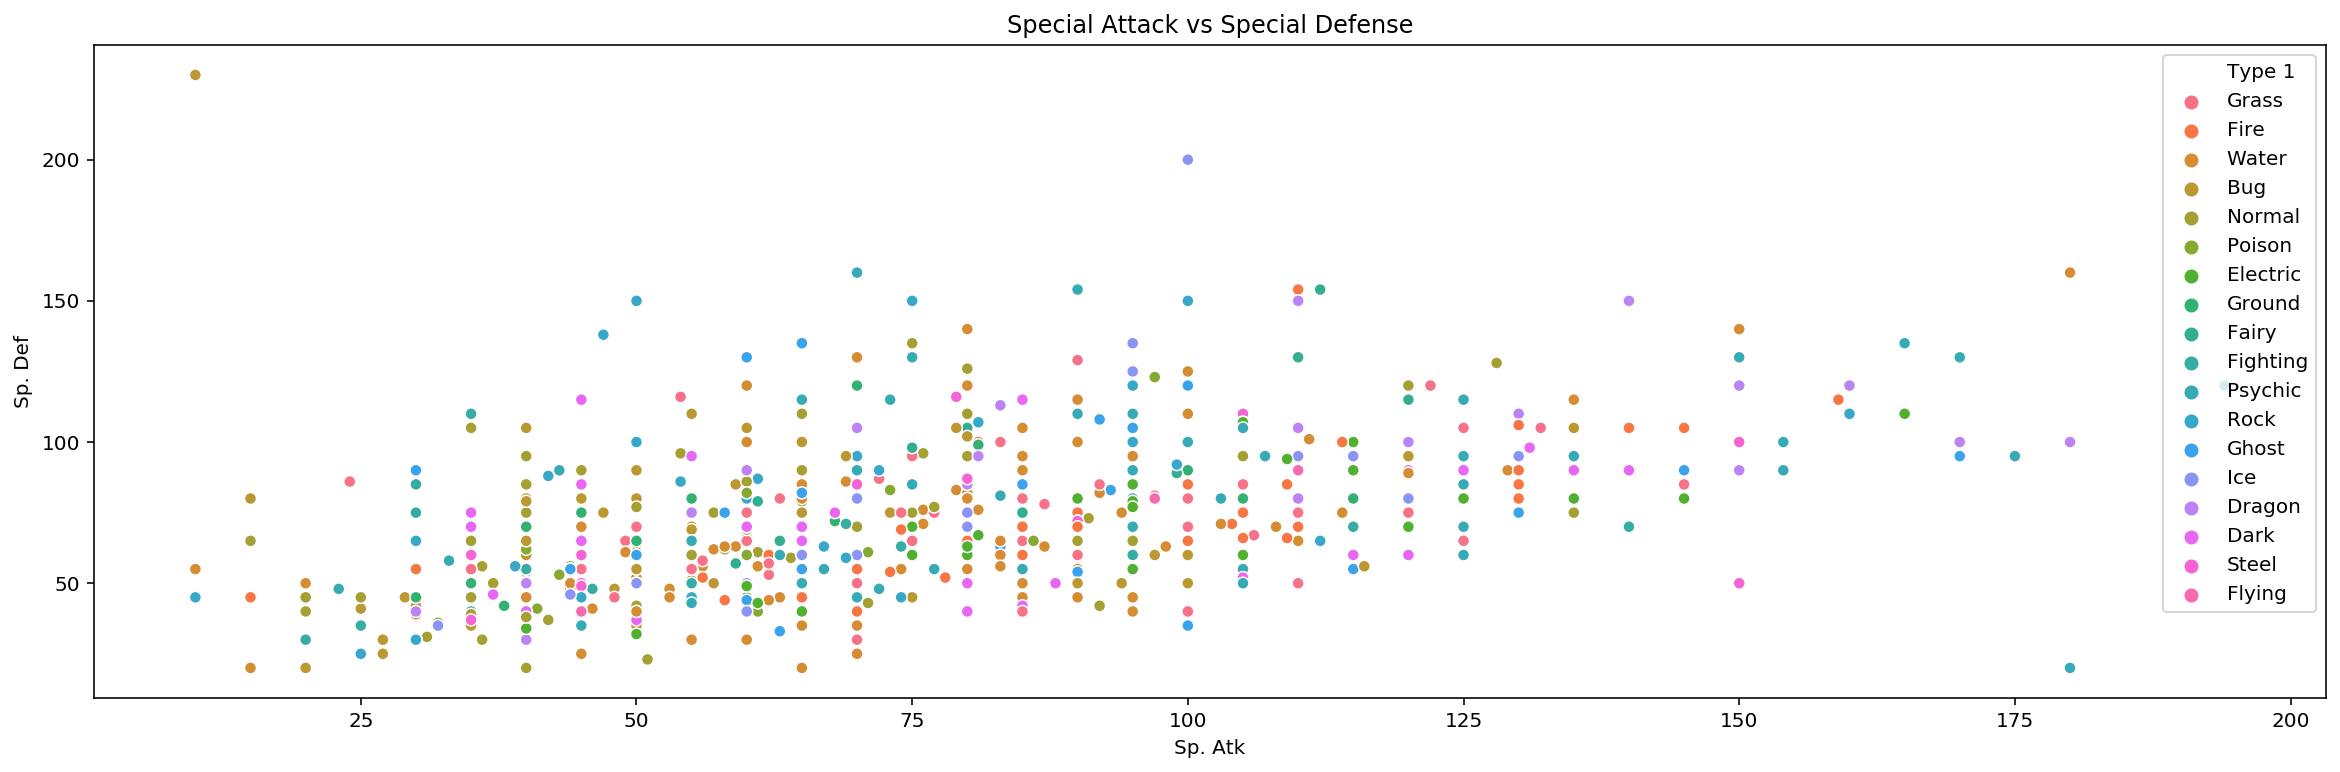

In [141]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=data, x="Sp. Atk", y="Sp. Def", hue="Type 1")
plt.title("Special Attack vs Special Defense")
# should be linear

Investigating Legendary Pokemon Closer...
    
Legendary Pokémon are a special type of Pokémon that are very powerful that are often associated with legends of creation and/or destruction within their endemic regions. Some legendary pokemon are based off real cultures and historic mythical creatures.

In [193]:
Legendary = data[data['Legendary'] == True]
Legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [190]:
fig = px.histogram(Legendary, x="Type 1", color='Type 1', nbins=10)
fig.show()

In [201]:
fig = px.histogram(Legendary.dropna(), x="Type 2", color='Type 2', nbins=10)
fig.show()

In [192]:
fig = px.histogram(Legendary, x="Generation", color='Generation', nbins=10)
fig.show()

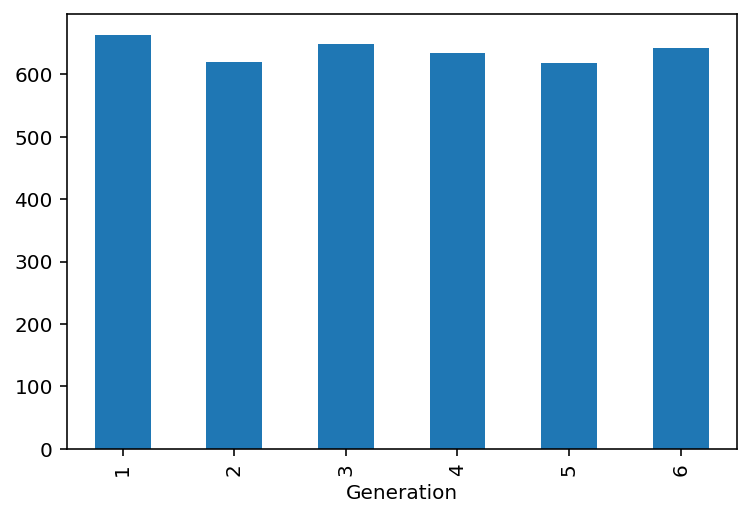

In [194]:
Legendary.groupby('Generation').Total.mean().plot(kind='bar')

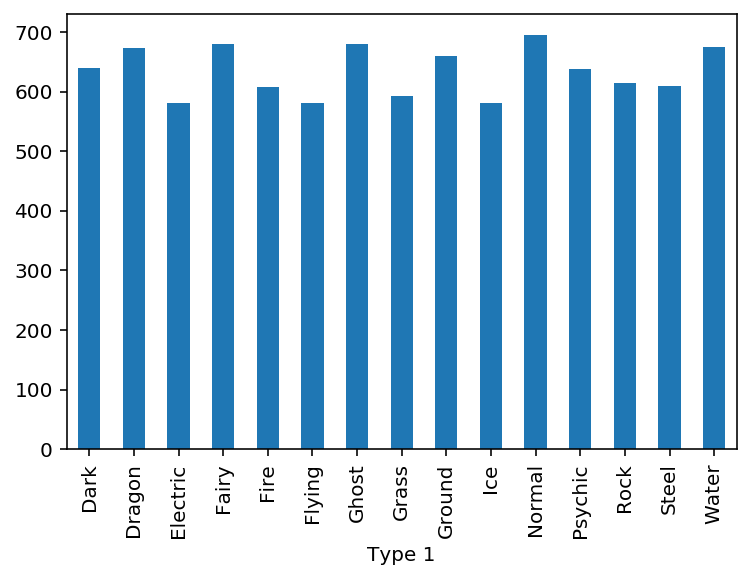

In [195]:
Legendary.groupby('Type 1').Total.mean().plot(kind='bar')

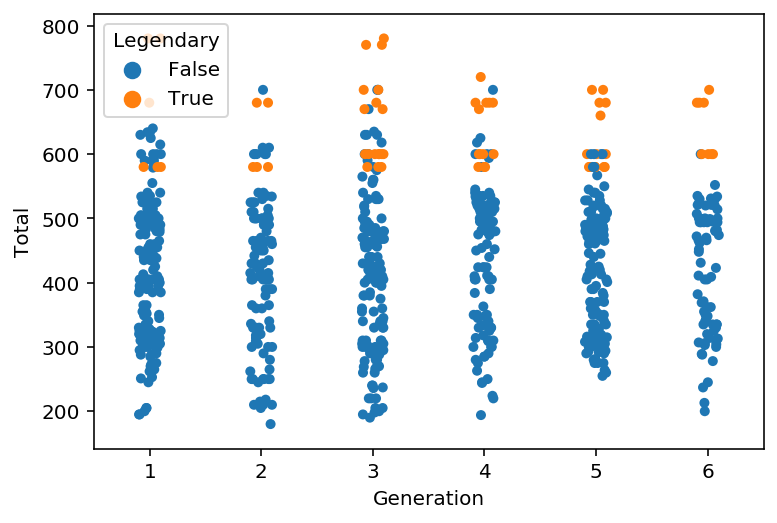

In [142]:
sns.stripplot(y = data['Total'], x = data['Generation'], hue=data['Legendary'])

# Methods
Step Five: Modeling

In [143]:
from sklearn.model_selection import train_test_split

X = data[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']]
y = data['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Logistic Regression 
A logistic regression model is a model that has a certain fixed number of parameters that depend on the number of input features, and it outputs a categorical prediction. The model is very similar to linear regression, but for categorial variables.

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


score_log = round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy score:", score_log)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy score: 90.5
[[179   0]
 [ 19   2]]
              precision    recall  f1-score   support

       False       0.90      1.00      0.95       179
        True       1.00      0.10      0.17        21

    accuracy                           0.91       200
   macro avg       0.95      0.55      0.56       200
weighted avg       0.91      0.91      0.87       200



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



# K-Nearest Neighbors
The supervised learning technique K-nearest neighbors (KNN) is used for both regression and classification. By computing the distance between the test data and all of the training points, KNN tries to predict the proper class for the test data. Then choose the K number of points that are the most similar to the test data. The KNN algorithm analyzes the likelihood of test data belonging to each of the 'K' training data classes, and the class with the highest probability is chosen.

In [197]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("Accuracy score: ", score_knn)
print('Confusion Matrix:', confusion_matrix(y_test, Y_pred_knn))
print('Classification Report: ', classification_report(y_test, Y_pred_knn))

Accuracy score:  94.0
[[175   4]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       179
        True       0.76      0.62      0.68        21

    accuracy                           0.94       200
   macro avg       0.86      0.80      0.83       200
weighted avg       0.94      0.94      0.94       200



# Decision Trees
A decision tree is a flowchart-like tree structure in which each internal node represents an attribute test, each branch reflects the test's conclusion, and each leaf node (terminal node) stores a class label.
By separating the source set into subgroups based on an attribute value test, a tree can be "trained." Recursive partitioning is the process of repeating this method on each derived subset. When all of the subsets at a node have the same value of the target variable, or when splitting no longer adds value to the predictions, the recursion is complete.

In [198]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
score_dec = round(accuracy_score(y_pred1,y_test)*100,2)

print("Accuracy Score:", score_dec)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred1))
print('Classification Report: ', classification_report(y_test, y_pred1))

Accuracy Score: 96.0
[[177   2]
 [  6  15]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       179
        True       0.88      0.71      0.79        21

    accuracy                           0.96       200
   macro avg       0.92      0.85      0.88       200
weighted avg       0.96      0.96      0.96       200



# XG Boost
XGBoost stands for Extreme Gradient Boosting, a popular algorithm in modern machine learning. Boosting is an ensemble modeling strategy that aims to create a strong classifier out of a large number of weak ones. It is accomplished by constructing a model from a sequence of weak models. To begin, a model is created using the training data. The second model is then created, which attempts to correct the faults in the first model. This approach is repeated until either the entire training data set is properly predicted or the maximum number of models has been added.
In XGBoost, Decision trees are constructed sequentially. Weights are very significant. All of the independent variables are given weights, which are subsequently fed into the decision tree, which predicts outcomes. The weight of factors that the tree predicted incorrectly is increased, and these variables are fed into the second decision tree. These various classifiers/predictors are then combined to create a more powerful and precise model. It can be used to solve problems including regression, classification, ranking, and user-defined prediction.

In [199]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("Accuracy score: ", score_xgb)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_xgb))
print('Classification Report: ', classification_report(y_test, y_pred_xgb))

Accuracy score:  93.5
[[175   4]
 [  9  12]]
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       179
        True       0.75      0.57      0.65        21

    accuracy                           0.94       200
   macro avg       0.85      0.77      0.81       200
weighted avg       0.93      0.94      0.93       200



# Detailed Results

Here is a summary of all of the accuracy rates for the different models (when I ran them):

Logistic Regression: 90.5%

K-Nearest Neighbors: 94.0%

Decision Trees: 96.0%

XGBoost: 93.5%

The most accurate algorithm for this data set is decision trees. Meaning, the decision tree classifier correctly classified pokemon 96% of the time compared to other models that had lower accuracy rates. 

# Discussion

....

# Citations
I used code from class.


Microsoft. (n.d.). Pokemon PNG. Bing. Retrieved April 21, 2022, from https://www.bing.com/images/search?view=detailV2&amp;ccid=Rsw8DYbv&amp;id=820AFE5EF8AEE645F590971F50BA85C52FA1DCAD&amp;thid=OIP.Rsw8DYbvdS6AJdBKTnLLAQHaEK&amp;mediaurl=https%3A%2F%2Fs3.us-east-1.amazonaws.com%2Fdexerto-assets-production-cbbdf288%2Fuploads%2F2020%2F09%2F03141440%2Fpokemon-most-popular-legendary.jpg&amp;cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.46cc3c0d86ef752e8025d04a4e72cb01%3Frik%3DrdyhL8WFulAflw%26pid%3DImgRaw%26r%3D0&amp;exph=900&amp;expw=1600&amp;q=pokemon%2Blegendary&amp;simid=607987775357855127&amp;FORM=IRPRST&amp;ck=981A88BE09EBE8161B369D43DD91A5F3&amp;selectedIndex=5&amp;ajaxhist=0&amp;ajaxserp=0 


XGBoost. GeeksforGeeks. (2021, October 24). Retrieved April 21, 2022, from https://www.geeksforgeeks.org/xgboost/ 


Christopher, A. (2021, February 3). K-Nearest Neighbor. Medium. Retrieved April 21, 2022, from https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K-nearest%20neighbors%20%28KNN%29%20is%20a%20type%20of%20supervised,points%20which%20is%20closet%20to%20the%20test%20data. 

z_ai. (2021, September 26). Logistic regression explained. Medium. Retrieved April 21, 2022, from https://towardsdatascience.com/logistic-regression-explained-9ee73cede081 